In [5]:
import imexam
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
import pyregion
import matplotlib.cm as cm
from photutils import find_peaks
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.table import Table, vstack
import pandas as pd
from pathlib import Path
from astropy.io import fits

In [72]:
viewer = imexam.connect()
# a = Path('/home/scantu/092018_ufdg_followup/psfphot/indii/test/').glob('Ind_II.7815_*.fits')

In [74]:
# viewer.load_fits('./rband/rmasktest.fits')
viewer.load_fits('./apr2_daophot/gcutout.fits')
viewer.scale()
# len(sorted(a))
# p =sorted(a)

In [117]:
# I = fits.open(sorted(a))
p[1].stem

'Ind_II.7815_10'

In [154]:
# I = fits.open('./test/Ind_II.7816.fits')
rf = './test/indiir1_1.als'
rtbdata = ascii.read(rf, data_start=3, names=['starid', 'rx', 'ry', 'rmag','rmerr','rsky', 'riter','rchi','rsharp'])#, format='no_header') 

# reg = pyregion.open('./test/allframe.opt')

In [167]:
df = sorted(Path('./test/').glob('indii*als'))
df[0].name

'indiir1_1.als'

In [77]:
viewer.set_plot_pars('r','skyrad',22.)
viewer.set_plot_pars('r','rplot',19.)
viewer.set_plot_pars('r','fitplot',True)
viewer.set_plot_pars('r','marker','.')
viewer.set_plot_pars('g','skyrad',22.)
viewer.set_plot_pars('g','rplot',19.)
viewer.set_plot_pars('g','fitplot',True)
viewer.set_plot_pars('g','marker','.')

set radial_profile_pars: skyrad to 22.0
set radial_profile_pars: rplot to 19.0
set radial_profile_pars: fitplot to True
set radial_profile_pars: marker to .
No parameter of that name in dictionary
set curve_of_growth_pars: rplot to 19.0
No parameter of that name in dictionary
set curve_of_growth_pars: marker to .


set line_fit_pars: func to Gaussian1D
set column_fit_pars: func to Moffat1D

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/scantu/092018_ufdg_followup/psfphot/grui/apr2_daophot/gcutout.fits
xc=4586.764730	yc=4551.703703
Background per pixel: 805.475281
Max. pix. flux =   926.296
amp =   987.358
fwhm =     5.381


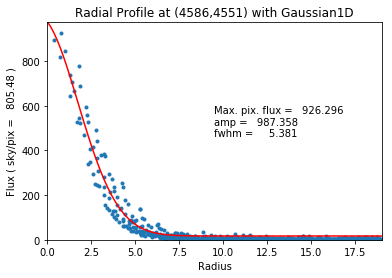

xc=4586.760711	yc=4551.703732

at (x,y)=4586,4551
radii:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
flux:[-872.9847687528472, 3554.9856076057986, 10839.461849290783, 14117.56669800132, 13843.643110280384, 20753.2118380811, 17977.97527398159, 19483.58594483731, 22075.963894593617, 19390.531425496534, 21211.0056395969, 14731.82818728534, 16194.814376178954, 22109.945956766198, 19635.45321469137, 18502.479033255484, 12395.314489118638, 17239.13774390181, 20266.43073119875]


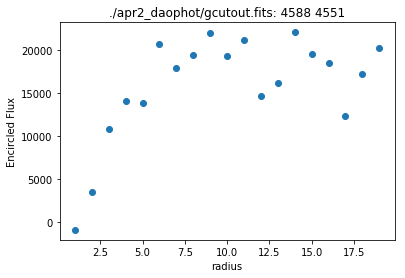

xc=4575.048138	yc=4747.157513

at (x,y)=4575,4747
radii:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
flux:[5709.243777152044, 52878.245128139424, 111505.44960960277, 149170.30058091707, 169683.6043164964, 191583.06906829387, 195329.79999988372, 201009.98467230107, 206133.8589864249, 204857.18630895432, 207649.5701555144, 201729.9325231755, 203582.12308234768, 209839.3481318591, 207555.6306209286, 206687.65145775897, 200857.65459987032, 206119.0249349574, 209574.95759241516]


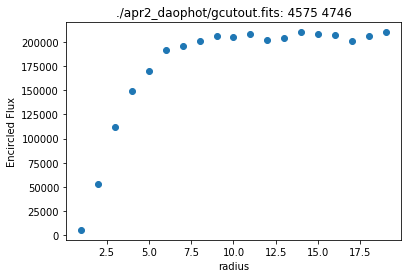

Cutout at (4575,4748) saved to /home/scantu/092018_ufdg_followup/psfphot/grui/cutout_4575_4748__g09rk9v.fits
Cutout at (4577,4748) saved to /home/scantu/092018_ufdg_followup/psfphot/grui/cutout_4577_4748_vpnegt2i.fits
xc=4575.052150	yc=4747.157421
Background per pixel: 809.472352
Max. pix. flux =  7437.125
amp =  8092.690
fwhm =     5.580


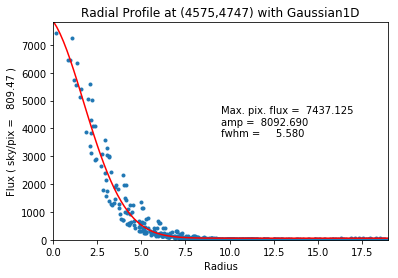

ValueError: not enough values to unpack (expected 3, got 0)

In [78]:
# Gaussian1D, Moffat1D, MexicanHat1D, AiryDisk2D, and Polynomial1D.
viewer.set_plot_pars('j', 'func', 'Gaussian1D')
viewer.set_plot_pars('k','func','Moffat1D')

viewer.imexam()


In [66]:
filename = './apr2_daophot/gcutout.fits'
listname = './apr2_daophot/gcutout.srt'
from imexam.imexamine import Imexamine
from imexam.math_helper import mfwhm, gfwhm
#get your data into an array
data=fits.getdata(filename)
print(data.min())

#get an object up with your data attached
plots=Imexamine()
plots.set_data(data)
starlist = ascii.read(listname, data_start=2)
plots.line_fit_pars['func'] = ['Gaussian1D']
plots.column_fit_pars['func'] = ['Gaussian1D']
# x,y = np.array(starlist['col2']).astype(float), np.array(starlist['col3']).astype(float)
# results = np.zeros((3,len(starlist)))


results = dict()
yresults = dict()
# print(starlist)
for star in starlist:
#     print(star)
#     print(starlist[0])

    sid,x,y,a4,a5,a6,a7=star
#     moff = plots.line_fit(x,y,genplot=False)
    ymoff = plots.column_fit(x,y,genplot=False)
#     print(ymoff[0].alpha.value)
#     results['x'][sid] = x
#     results['y'][sid] = y
#     results['xfwhm'][sid] = 
#    results[x] = mfwhm(alpha=moff.alpha_0,gamma=moff.gamma_0)
#     results['yfwhm'][sid] = 
#     yresults[y] = mfwhm(alpha=ymoff[0].alpha.value,gamma=ymoff[0].gamma.value)
#     gresults[x] = gfwhm(moff.stddev_0)[0]
    yresults[y] = gfwhm(ymoff.stddev_0)[1]

# x,y = np.array(starlist['col2']).astype(float), np.array(starlist['col3']).astype(float)
# results = np.zeros((3,len(starlist)))

    
    


-27217596.0
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=8947.776828	yc=771.445887
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=782.247410	yc=3520.210332
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=5102.951633	yc=7695.612014
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=9239.020058	yc=4563.991749
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=2183.095856	yc=13

ValueError: zero-size array to reduction operation maximum which has no identity

In [70]:
3.25*5

16.25

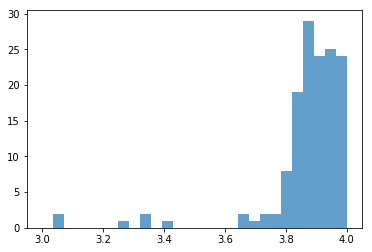

In [67]:
plt.hist(yresults.values(), bins='auto', alpha=.7, range=(3.,4))
# plt.hist(results['xfwhm'], bins=100, alpha=.7)#, range=(3.,4.5))
plt.show()
# results
# print(results)

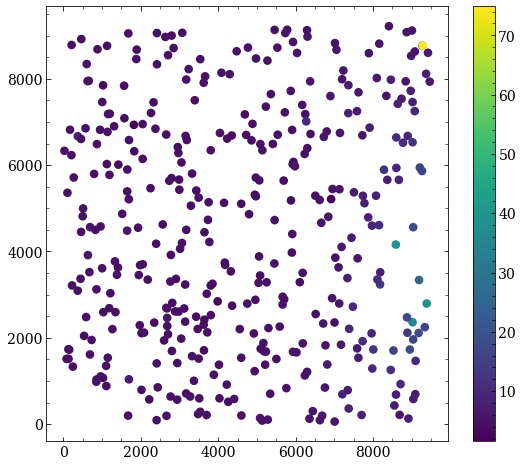

In [104]:
plt.figure(figsize=(9,8))
plt.scatter(list(results.keys()), list(yresults.keys()), c=list(results.values()), edgecolors='none', s=75)#, mec='none', alpha=.5)
plt.colorbar()

In [106]:
df = pd.DataFrame()
df['x'] = list(results.keys())
df['y'] = list(yresults.keys())
df['xf'] = list(results.values())
df['yf'] = list(yresults.values())
print(len(df))
df = df[(df['xf']<7.5) & (df['xf']>3.) & (df['yf']<6.) & (df['yf']>2.)]
print(len(df))
# med = np.median(list(results.values()))
# mu = np.mean(list(results.values()))

389
324


In [108]:
med = np.median(df['yf'])
mu = np.mean(df['yf'])
print(med,mu)

4.425041077123582 4.423914852951318


In [124]:
th = np.arange(2,9,1.)
stars = [40998,23093,7100,1449,318,154,126]

(4, 7)

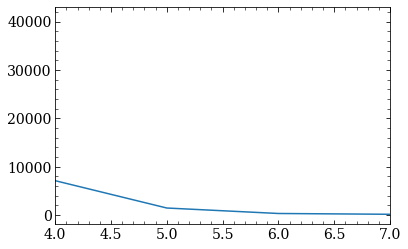

In [126]:
plt.figure()
plt.plot(th,stars)
plt.xlim(4,7)

In [141]:
gfile = './daophot1/test.dat'
gtbl = ascii.read(gfile, names=['starid', 'gx', 'gy', 'gmag',
                               'gmerr', 'gsky', 'giter', 'gchi', 'gsharp'])

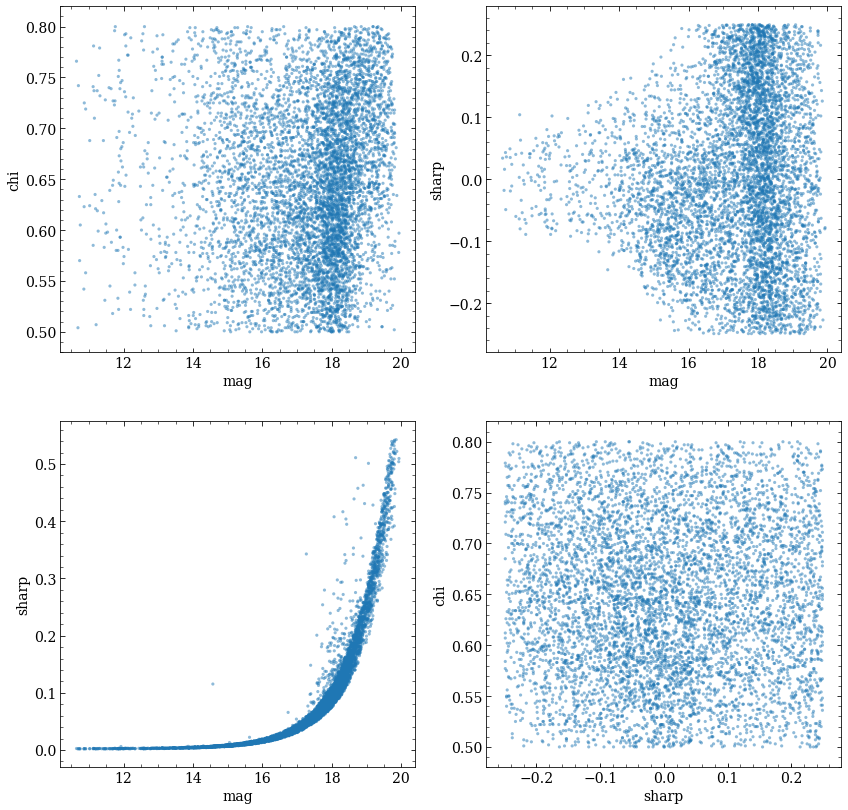

In [159]:
gtbl = gtbl[(gtbl['gsharp']>-.25) & (gtbl['gchi']<=.8) & (gtbl['gsharp']<.25) & (gtbl['gchi']>=.5)]
plot4(gtbl['gmag'], gtbl['gmerr'], gtbl['gchi'], gtbl['gsharp'], s=14,a=.5)
# plot4(gtbl1['gmag'], gtbl1['gmerr'], gtbl1['gchi'], gtbl1['gsharp'], s=16,a=.5)
plt.show()

In [144]:
def plot4(mag,err,chi,sharp,s=12,a=.5):                                                    
...:     plt.figure(figsize=(s,s))                                                            
...:     plt.subplot(221)                                                                       
...:     plt.scatter(mag,chi,s=10,edgecolors='none',alpha=a)                                   
...:     plt.xlabel('mag')                                                                      
...:     plt.ylabel('chi')                                                                      
...:     plt.subplot(222)                                                                       
...:     plt.scatter(mag,sharp,s=10,edgecolors='none',alpha=a)                                 
...:     plt.xlabel('mag')                                                                      
...:     plt.ylabel('sharp')                                                                    
...:     plt.subplot(223)                                                                       
...:     plt.scatter(mag,err,s=10,edgecolors='none',alpha=a)                                   
...:     plt.xlabel('mag')                                                                      
...:     plt.ylabel('sharp')                                                                    
...:     plt.subplot(224)                                      
...:     plt.scatter(sharp,chi,s=10,edgecolors='none',alpha=a)
...:     plt.xlabel('sharp')                                     
...:     plt.ylabel('chi')                                     
...:     plt.show() 

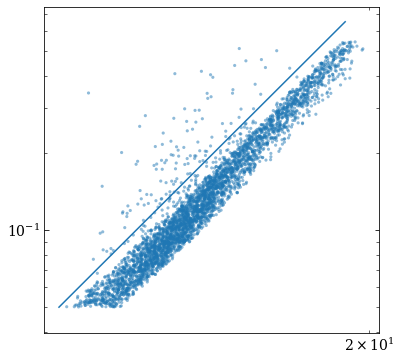

In [198]:
gtbl1 = gtbl[np.logical_and(gtbl['gmag']>17., gtbl['gmerr']>.05)]
xlin = np.linspace(0,1,2)
plt.figure(figsize=(6,6))
plt.scatter(gtbl1['gmag'], gtbl1['gmerr'], edgecolors='none', alpha=.5, s=10)
plt.plot([17.,19.75],[.05,.65])
plt.loglog()
plt.show()

In [81]:
7200/2340

3.076923076923077